In [103]:
from sklearn.datasets import load_iris
import torch

from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
class Trainer:

    def __init__(self,model,epoch=None,criterion=None,optimizer=None)-> None:
        super().__init__()
        self.model = model
        self.epoch = epoch or 1000
        self.criterion = criterion or torch.nn.MSELoss()
        self.optimizer = optimizer or torch.optim.SGD(model.parameters(), lr = 0.01)

    def fit(self,x_train,y_train):
        x_train = Variable(torch.tensor(x_train,dtype=torch.float))
        y_train = Variable(torch.tensor(y_train,dtype=torch.float))

        epoch = self.epoch
        model = self.model
        criterion = self.criterion
        optimizer = self.optimizer

        self.loss_history = []
        for i in range(epoch):
            optimizer.zero_grad()

            # Forward
            y_pred = model(x_train)

            # Loss
            loss = criterion(y_pred.squeeze(), y_train)
            self.loss_history.append(loss)
            if not i % 50 :
                print(f'Epoch {i}: train loss: {loss.item()}')

            # Backward pass
            loss.backward()
            optimizer.step()

    def plot_loss(self):
        plt.plot(self.loss_history)

In [105]:
class Network(torch.nn.Module):
    def __init__(self,n_input=4, n_output=1):
        super(Network, self).__init__()
        self.fc = torch.nn.Linear(n_input,n_output)
    def forward(self, x):
        x = self.fc(x)

        return x

network = Network(n_input=4, n_output=1)
t = Trainer(model=network)

In [106]:
data = load_iris()
X = data['data']
Y = data['target']
t.fit(x_train=X,y_train=Y)

Epoch 0: train loss: 1.4203945398330688
Epoch 50: train loss: 0.09970685839653015
Epoch 100: train loss: 0.08118071407079697
Epoch 150: train loss: 0.07637655735015869
Epoch 200: train loss: 0.07240861654281616
Epoch 250: train loss: 0.0690152645111084
Epoch 300: train loss: 0.06611021608114243
Epoch 350: train loss: 0.06362178176641464
Epoch 400: train loss: 0.061488792300224304
Epoch 450: train loss: 0.059659119695425034
Epoch 500: train loss: 0.05808839201927185
Epoch 550: train loss: 0.05673870071768761
Epoch 600: train loss: 0.055577781051397324
Epoch 650: train loss: 0.05457812175154686
Epoch 700: train loss: 0.053716227412223816
Epoch 750: train loss: 0.05297210067510605
Epoch 800: train loss: 0.05232866108417511
Epoch 850: train loss: 0.051771380007267
Epoch 900: train loss: 0.05128781497478485
Epoch 950: train loss: 0.05086739361286163


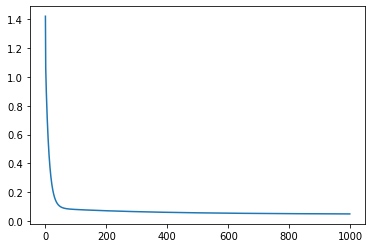

In [107]:
t.plot_loss()